In [241]:
#importing the required libraries

%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
#customizing with some CSS

from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
#Reading/Cleaning the Movies Data.

df = pd.read_excel('data/Movies.xlsx',index_col=None)
df['Year'] = (df['Movie Name']).str.extract('(\d\d\d\d)',expand = True)
df['Movie Name'] = (df['Movie Name']).str.replace('(\(....\))','')
df1 = pd.DataFrame(df)
df2 = pd.DataFrame(df1['Genre'].str.split('\|').tolist(),columns=['a','b','c','d','e','f'])
df2['Movie ID'] = df1['Movie ID']
df3 = df.merge(df2)
df3.drop(['Genre', 'd','e','f'], axis=1, inplace=True)
df4 = pd.melt(df3, id_vars=["Movie ID", "Movie Name","Year"], 
                  var_name="Date", value_name="Genre")
del df4['Date']
movies=df4.sort_values(by=['Movie ID'])
movies = movies.dropna()



In [4]:
#Reading/Cleaning the Ratings Data.

ratings = pd.read_excel('data/Ratings.xlsx',index_col=None)
del ratings['Timestamp'] #Removing Timestamp column


In [5]:
#Reading/Cleaning the Users Data.
users = pd.read_excel('data/Users.xlsx',index_col=None)
del users['Zipcode'] #Removing Zipcode column, since it is not required.
for index,row in users.iterrows():
    if(row.Occupation == 0):
        users.loc[index,"Profession"]="Other"
    elif(row.Occupation == 1):
        users.loc[index,"Profession"]="Academic"
    elif(row.Occupation == 2):
        users.loc[index,"Profession"]="Artist"
    elif(row.Occupation == 3):
        users.loc[index,"Profession"]="Clerk"
    elif(row.Occupation == 4):
        users.loc[index,"Profession"]="College Student"
    elif(row.Occupation == 5):
        users.loc[index,"Profession"]="Customer Service"
    elif(row.Occupation == 6):
        users.loc[index,"Profession"]="Doctor"
    elif(row.Occupation == 7):
        users.loc[index,"Profession"]="Manager"
    elif(row.Occupation == 8):
        users.loc[index,"Profession"]="Farmer"
    elif(row.Occupation == 9):
        users.loc[index,"Profession"]="HomeMaker"
    elif(row.Occupation == 10):
        users.loc[index,"Profession"]="K-12 Student"
    elif(row.Occupation == 11):
        users.loc[index,"Profession"]="Lawyer"
    elif(row.Occupation == 12):
        users.loc[index,"Profession"]="Programmer"
    elif(row.Occupation == 13):
        users.loc[index,"Profession"]="Retired"
    elif(row.Occupation == 14):
        users.loc[index,"Profession"]="Sales"
    elif(row.Occupation == 15):
        users.loc[index,"Profession"]="Scientist"
    elif(row.Occupation == 16):
        users.loc[index,"Profession"]="Self-Employed"
    elif(row.Occupation == 17):
        users.loc[index,"Profession"]="Engineer"
    elif(row.Occupation == 18):
        users.loc[index,"Profession"]="Craftsman"
    elif(row.Occupation == 19):
        users.loc[index,"Profession"]="Unemployed"
    elif(row.Occupation == 20):
        users.loc[index,"Profession"]="Writer"

In [6]:
#Merging Ratings data and Users Data
Users = users.merge(ratings)

In [198]:
#Merging Everything
final = movies.merge(Users)


In [199]:
#Final Dataset
final = final.sort_values(by=['User ID'])

In [200]:
#Replacing the space in the column names
final.columns = [x.strip().replace(' ', '_') for x in final.columns]

In [201]:
final.head()

,Movie_ID,Movie_Name,Year,Genre,User_ID,Sex,Age_Group,Occupation,Profession,Rating
0,1,Toy Story,1995,Animation,1,F,1,10,K-12 Student,5
481490,1028,Mary Poppins,1964,Children's,1,F,1,10,K-12 Student,5
380413,783,"Hunchback of Notre Dame, The",1996,Children's,1,F,1,10,K-12 Student,4
380803,783,"Hunchback of Notre Dame, The",1996,Musical,1,F,1,10,K-12 Student,4
381193,783,"Hunchback of Notre Dame, The",1996,Animation,1,F,1,10,K-12 Student,4


In [202]:
f = final

In [12]:
#Number Of Movies
f.Movie_ID.nunique()

3514

In [13]:
#Number Of Users
f.User_ID.nunique()

6040

In [14]:
#Number of Female Users
female = f[f.Sex=='F']
female.User_ID.nunique()

1709

In [67]:
#Number of Male Users
male = f[f.Sex=='M']
male.User_ID.nunique()

4331

In [203]:
# How many profession are there in the final dataframe?

print("Number of Professions:",f.Profession.nunique())
professions = f.groupby(['Profession'])['User_ID'].nunique().reset_index()
professions
#professions = professions.sort_values(by=['User_ID'],ascending=False)



Number of Professions: 21


,Profession,User_ID
0,Academic,528
1,Artist,267
2,Clerk,173
3,College Student,759
4,Craftsman,70
5,Customer Service,112
6,Doctor,236
7,Engineer,502
8,Farmer,17
9,HomeMaker,92


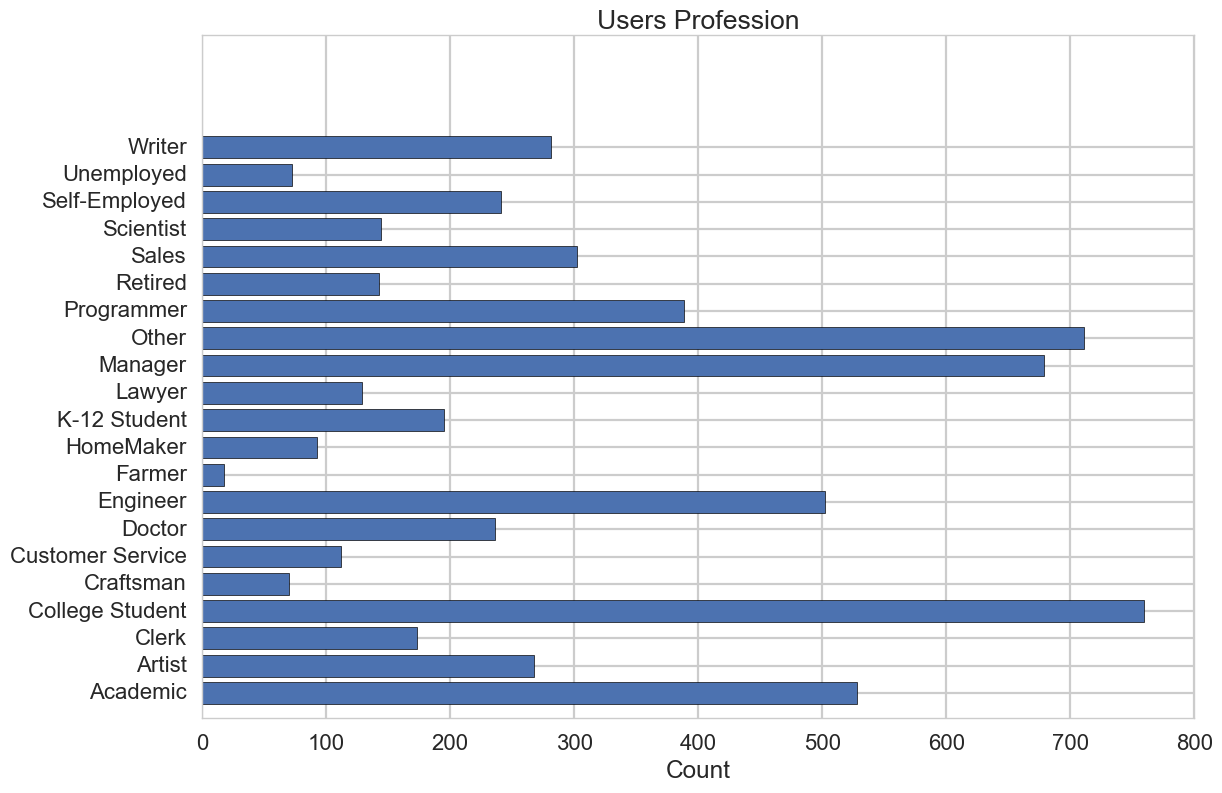

In [242]:
#bar graph on number of professions.
pos = arange(f.Profession.nunique())+.9  # the bar centers on the y axis

barh(pos,professions.User_ID, align='center')
yticks(pos, (professions.Profession))
xlabel('Count')
title('Users Profession')


In [17]:
#How many Genre are there in total and their counts?

print("Number of Genre:",f.Genre.nunique())
f.groupby(['Genre'])['Movie_ID'].nunique().reset_index()

Number of Genre: 18


,Genre,Movie_ID
0,Action,447
1,Adventure,251
2,Animation,95
3,Children's,222
4,Comedy,1123
5,Crime,191
6,Documentary,91
7,Drama,1456
8,Fantasy,51
9,Film-Noir,44


In [49]:
f.head()
pd.isnull(f).any(1).nonzero()[0]

array([], dtype=int64)

In [100]:
#Most watched Genre by Females
female = f[f.Sex=='F']
female = female.groupby(['Genre'])['User_ID'].nunique().reset_index()
female.sort_values(by=['User_ID'],ascending=False)


,Genre,User_ID
7,Drama,1708
4,Comedy,1704
13,Romance,1689
0,Action,1679
15,Thriller,1668
1,Adventure,1598
16,War,1561
5,Crime,1550
14,Sci-Fi,1520
3,Children's,1493


In [99]:
#Most watched Genre by Males
male = f[f.Sex=='M']
male = male.groupby(['Genre'])['User_ID'].nunique().reset_index()
male.sort_values(by=['User_ID'],ascending=False)

,Genre,User_ID
7,Drama,4328
4,Comedy,4325
0,Action,4307
15,Thriller,4289
13,Romance,4192
1,Adventure,4180
14,Sci-Fi,4150
5,Crime,4067
16,War,3994
10,Horror,3887


In [51]:
#What Genre is mostly watched by Under 18 people
f.head()
under18 = f[f.Age_Group==1]
under18 = under18.groupby(['Genre'])['User_ID'].nunique().reset_index()
under18.sort_values(by=['User_ID'],ascending=False)
f.head()

,Movie_ID,Movie_Name,Year,Genre,User_ID,Sex,Age_Group,Occupation,Profession,Rating
0,1,Toy Story,1995,Animation,1,F,1,10,K-12 Student,5
481490,1028,Mary Poppins,1964,Children's,1,F,1,10,K-12 Student,5
380413,783,"Hunchback of Notre Dame, The",1996,Children's,1,F,1,10,K-12 Student,4
380803,783,"Hunchback of Notre Dame, The",1996,Musical,1,F,1,10,K-12 Student,4
381193,783,"Hunchback of Notre Dame, The",1996,Animation,1,F,1,10,K-12 Student,4


In [247]:
#Mean ratings of All the Users on Different Genre.
f=final
ratings = f.groupby(['Genre'])
Mean_Ratings = ratings['Rating'].mean()

In [173]:
#Mean ratings of Male Users on Different Genre.

#ratings = ratings.apply(lambda x: x[x['User_ID'] == 4])
ratings = f[f.Sex=='M']
ratings = ratings.groupby('Genre')
M_Mean = ratings['Rating'].mean()

In [246]:
#Mean ratings of Female Users on Different Genre.

#ratings = ratings.apply(lambda x: x[x['User_ID'] == 4])
ratings = f[f.Sex=='F']
ratings = ratings.groupby('Genre')
F_Mean = ratings['Rating'].mean()


In [248]:
#Converting the required values from the dataframe to numpy variables for plotting the bar graph
ff = final.drop_duplicates('Genre')
ff = ff['Genre']
numpyMatrix = ff.as_matrix()
F_MeanNumpy = F_Mean.as_matrix()
M_MeanNumpy = M_Mean.as_matrix()

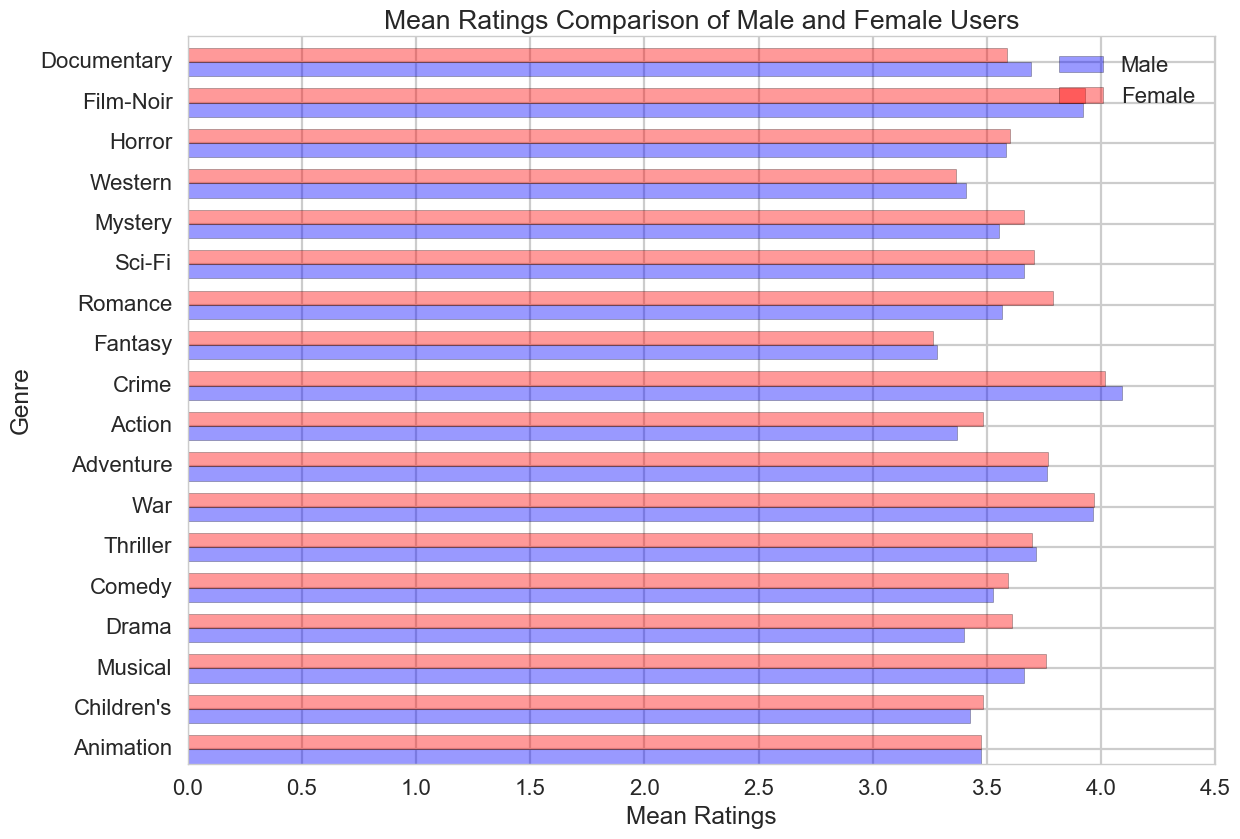

In [251]:
#Plotting Graph between the Mean ratings of Male VS Female Users

n_groups = ff.count()

means_men = M_MeanNumpy
means_women = F_MeanNumpy

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
#error_config = {'ecolor': '0.3'}

rects1 = plt.barh(index, means_men, bar_width,
                 alpha=opacity,
                 color='b',
                 #error_kw=error_config,
                 label='Male')

rects2 = plt.barh(index + bar_width, means_women, bar_width,
                 alpha=opacity,
                 color='r',
                 #error_kw=error_config,
                 label='Female')

plt.xlabel('Mean Ratings')
plt.ylabel('Genre')
plt.title('Mean Ratings Comparison of Male and Female Users')
plt.yticks(index + bar_width, numpyMatrix)
plt.legend()

plt.tight_layout()
plt.show()

In [253]:
f.head()

,Movie_ID,Movie_Name,Year,Genre,User_ID,Sex,Age_Group,Occupation,Profession,Rating
0,1,Toy Story,1995,Animation,1,F,1,10,K-12 Student,5
481490,1028,Mary Poppins,1964,Children's,1,F,1,10,K-12 Student,5
380413,783,"Hunchback of Notre Dame, The",1996,Children's,1,F,1,10,K-12 Student,4
380803,783,"Hunchback of Notre Dame, The",1996,Musical,1,F,1,10,K-12 Student,4
381193,783,"Hunchback of Notre Dame, The",1996,Animation,1,F,1,10,K-12 Student,4


In [ ]:
#

In [21]:
#Percentage of Genre watched by Males and Females

In [22]:
#Percentage of Genre Ratings by Males and Females

In [252]:
# if(row['Age Group'] == 1):
#         users.loc[index,"Age Desc"]="Under 18"
#     elif(row['Age Group'] == 18):
#         users.loc[index,"Age Desc"]="18-24"
#     elif(row['Age Group'] == 25):
#         users.loc[index,"Age Desc"]="25-34"
#     elif(row['Age Group'] == 35):
#         users.loc[index,"Age Desc"]="35-44"
#     elif(row['Age Group'] == 45):
#         users.loc[index,"Age Desc"]="45-49"
#     elif(row['Age Group'] == 50):
#         users.loc[index,"Age Desc"]="50-55"
#     elif(row['Age Group'] == 56):
#         users.loc[index,"Age Desc"]="Above 56"